## Introduction to Dense Neural Networks

Dense Neural Networks, also known as fully connected neural networks, are a foundational concept in the field of deep learning and artificial intelligence. They represent a significant advancement from single-layer models like the Perceptron and form the basis for many complex neural network architectures used today.

### What are Dense Neural Networks?

A Dense Neural Network consists of multiple layers of neurons, each connected to all neurons in the previous and subsequent layers. These networks are "dense" because of the high level of connectivity between neurons. Each neuron in a Dense Neural Network performs a weighted sum of its inputs, applies an activation function, and passes the result to the next layer.

## How Do Dense Neural Networks Work?

The operation of a Dense Neural Network can be summarized in the following steps:
1. **Initialization**: Weights and biases are initialized, often randomly.
2. **Forward Propagation**: Starting from the input layer, the network processes the inputs through its layers. Each neuron computes a weighted sum of its inputs and an activation function is applied.
3. **Output Layer**: The final layer produces the output of the network, which can be a classification or regression result.
4. **Backpropagation and Weight Update**: The network learns from errors in its output by adjusting the weights. This process uses algorithms like gradient descent and backpropagation to minimize error.
5. **Iteration**: The process of forward propagation, error calculation, and backpropagation is repeated, often across many epochs, until the model's performance is satisfactory.

### Benefits of Dense Neural Networks

- **Flexibility**: Can model complex, non-linear relationships in data.
- **Scalability**: Suitable for a wide range of applications, from simple tasks to complex problems.
- **Foundation for Deep Learning**: Understanding Dense Neural Networks is crucial for delving into more advanced deep learning architectures.

Below is a visual representation of a Dense Neural Network:

![Dense Neural Network Model](multilayerPerceptron.jpg)

### Dense Neural Network Implementation

We will start by importing necessary Python libraries and preparing the dataset for our neural network model.


We will be using a good example of a tensor data set called the fashion_mnist data set:

In [30]:
# The tensor data to analyze
from tensorflow.keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data - returns a pair of tuples
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

## Understanding the Fashion MNIST Dataset

Fashion MNIST is a widely used dataset in the field of machine learning and computer vision, particularly for benchmarking various image recognition algorithms. It serves as a direct drop-in replacement for the original MNIST dataset, which was based on handwritten digits. The Fashion MNIST dataset was created to provide a more challenging problem set for classification algorithms, as the items in Fashion MNIST are more complex than the handwritten digits in the original MNIST.

### Dataset Composition

- **Number of Images**: Fashion MNIST contains 70,000 grayscale images in total, divided into 60,000 training images and 10,000 test images.
- **Image Dimensions**: Each image is 28x28 pixels, represented in grayscale.
- **Classes**: The dataset includes 10 different classes, representing different types of clothing and accessories, such as T-shirts/tops, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.

### Importance in Machine Learning

- **Benchmarking**: Fashion MNIST is often used to benchmark the performance of machine learning algorithms, especially in the domain of image recognition.
- **Challenging**: While being more complex than the original MNIST dataset, it still allows for quick experimentation and prototyping of algorithms.

In the following sections, we will preprocess this dataset and use it to train and test a Dense Neural Network model.


In [31]:

# The training data (60,000 samples to train and 10,000 to test model)
print(f"np.shape(train_X) = {np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

# The matrix for each object (where each element of the matrix corresponds to intensity)
print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")


np.shape(train_X) = (60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 




## Inspecting Data Dimensions

We now examine the shapes of our training and testing data to confirm their structure:

- `train_X`: Shape indicates 60,000 training images.
- `test_X`: Shape shows 10,000 testing images.

Each image is a 28x28 pixel grayscale matrix. This verification helps us ensure the data is correctly structured for model input.

train_y[0] = 9 



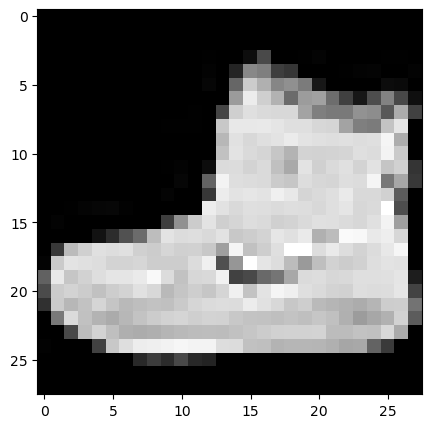

In [32]:
print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[0], cmap="gray")
plt.show()

## Data Preprocessing for Neural Network Input

In preparation for training our Dense Neural Network, we perform the following preprocessing steps:

1. **Normalization**: The pixel values of the images are scaled to a range of 0 to 1. This step is crucial for neural network models as it helps in achieving faster convergence during training.

2. **Flattening Images**: We transform the 28x28 pixel images into 784-element vectors. This flattening process converts our 2D image data into a format suitable for the input layer of a dense neural network.

3. **One-Hot Encoding Labels**: The categorical labels are converted into one-hot encoded vectors. This encoding transforms each label into a vector where the index corresponding to the label class is set to 1, and all other indices are 0. One-hot encoding is an effective way to handle categorical output in neural networks.


In [33]:
# normalize the data to be a value from  0 to 1
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

# Do the same for the testing data 
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)

## Building the Neural Network Model

In this phase, we construct our Dense Neural Network. The network will have an input layer of 784 nodes (corresponding to the 784 pixels of each flattened image) and a customizable number of hidden layers. We will use the sigmoid function as the activation function for the nodes. For evaluating the model's performance, the mean squared error (MSE) will serve as our cost function.

### Key Functions for the Model

1. **Sigmoid Function**: 
   - Used as the activation function in our neural network.
   - It maps any input value to a value between 0 and 1, which is essential for binary classifications and ensuring the output of neurons is normalized.

2. **Derivative of the Sigmoid Function**: 
   - Important for the backpropagation step in training, as it helps in calculating the gradient of the loss function with respect to the weights.

3. **Mean Squared Error (MSE)**: 
   - This function calculates the average of the squares of the errors or deviations (i.e., the difference between the predicted values and the actual values).
   - We use MSE as the cost function to measure the model's prediction accuracy.

With these functions defined, we'll be able to implement forward and backward propagation for training our neural network.


In [34]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

## Initializing the Network Weights

The next step in setting up our Dense Neural Network is to initialize the weights and biases. Proper initialization is crucial for the convergence and performance of the network during training.

### Weight Initialization Function

We define a function to initialize weights and biases for each layer in our network:

- **Input Layer Size (784)**: Corresponds to the 784 elements in each flattened input image.
- **Customizable Layer Configuration**: The function allows us to specify the number of neurons in each layer, including the hidden layers. This flexibility enables us to experiment with different network architectures.
- **Output Layer Size (10)**: Matches the 10 possible categories in the Fashion MNIST dataset.

### Key Aspects of the Initialization Function:

- **Weights and Biases for Each Layer**: The function initializes weights and biases for each layer, except for the input layer which doesn't have any weights.
- **Random Initialization with Scaling**: We use a scaled random normal distribution for initializing weights. Multiplying by `np.sqrt(2/layers[i-1])` helps in maintaining a balance in the variance of the activations throughout the network, which is beneficial for the learning process.

This initialization strategy sets the stage for effective training of the neural network.


In [35]:
def initialize_weights(layers = [784, 60, 60, 10]):
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network 
    # no weights on the 0'th layer.
    W = [[0.0]]
    B = [[0.0]]
    # for 3 layers in this case
    for i in range(1, len(layers)):
        # multiplying by np.sqrt(2/layers[i-1]) scales all of the weights together
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

## Feedforward Phase of the Neural Network

Having initialized the weights and prepared our data, we now proceed to the feedforward phase. This is a crucial step where the network makes predictions based on the input data.

### Process Overview

1. **Selecting an Input Sample**: We start by selecting a single flattened image (`xi`) and its corresponding one-hot encoded label (`yi`) from our preprocessed training data.

2. **Initial Activation (`a0`)**: The selected flattened image serves as the initial activation for the input layer of the network.

3. **Executing the Forward Pass**: 
   - The `forward_pass` function takes the initial activation, weights (`W`), biases (`B`), and the sigmoid activation function as inputs.
   - It computes the activations for each layer in the network.
   - The function also prints the shapes of the weights, the computed linear combinations (`z`), and the activations (`a`) at each layer for insight into the network's operation.

4. **Obtaining the Output (`y_hat`)**: 
   - The final output of the network is the last activation, which is our prediction.
   - We use `np.argmax` on `y_hat` to determine the predicted class.

5. **Prediction and Performance Evaluation**:
   - We compare the predicted class with the actual label (`yi`).
   - The Mean Squared Error (MSE) between the prediction and the actual label is calculated to evaluate the performance of the network on this single sample.

### Insight from the Feedforward Phase

This phase is critical in understanding how well our neural network processes an individual input. By examining the shapes of the activations and weights at each layer, as well as the MSE, we gain valuable insights into the network's functioning and can troubleshoot or optimize the architecture accordingly.



In [36]:
# Grab one of the flattened matrices
xi = flat_train_X[0]
# Hot-encoded vector associated with xi
yi = onehot_train_y[0]
a0 = xi

print(f"np.shape(a0) = {np.shape(a0)} \n")


def forward_pass(W, B, input_vec, activation_function):
    a = input_vec
    activations = [a]  # List to store all activations, layer by layer

    for i, (w, b) in enumerate(zip(W[1:], B[1:]), start=1):  # Skip the first layer as it's the input layer
        z = np.dot(w, a) + b
        a = activation_function(z)
        activations.append(a)

        # Print shapes in the specified format
        print(f"np.shape(W[{i}]) = {w.shape}")
        print(f"np.shape(z{i}) = {z.shape}")
        print(f"np.shape(a{i}) = {a.shape} \n")

    return activations

# By default is 784, 60, 60, 10
W, B = initialize_weights()

# Perform forward pass
activations = forward_pass(W, B, xi, sigmoid)

# The output of the network (y_hat) is the last activation
y_hat = activations[-1]

# y_hat will be the prediction (entry with highest numerical value is the prediction)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")


np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 7
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.5161062095958178


This is also a good sanity check to see that the dimensions of each layer are correct. In this case we see that the dimensions match up.

## Refinement of Forward Pass and Prediction

Here, we refined the `forward_pass` function to include an option for returning only the final activation layer when making predictions. This enhancement streamlines the process of using our neural network model for actual predictions.

- The function now accepts a `predict_vector` flag. When set to `True`, it returns only the output layer's activation, which is directly used for prediction.
- The `predict` function is introduced for a more straightforward way to obtain predictions. It utilizes the updated `forward_pass` function and applies `np.argmax` to identify the most likely class.

In testing this setup, we can quickly evaluate the neural network's performance on individual samples, making the process more efficient.


In [37]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 7
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.5161062095958178


In [38]:
# See how this works from a random pick on a large data set (Test functionality)
def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    
# Mean Squared error
def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [39]:
print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n")

random_experiment(W, B, flat_train_X, onehot_train_y)

MSE(W, B, flat_train_X, onehot_train_y) = 1.4166267522616112 

Actual label: 4
Predicted label: 2


## Training Process in Dense Neural Networks

The training process of our `DenseNetwork` class is rooted in fundamental concepts of machine learning and neural network theory. Let's delve into the mathematical algorithm behind the training method.

### Stochastic Gradient Descent (SGD)

At the heart of the training process lies Stochastic Gradient Descent (SGD), a powerful optimization algorithm. SGD iteratively updates the network's weights and biases to minimize the cost function, in our case, the Mean Squared Error (MSE). The key steps are as follows:

1. **Initial Cost Evaluation**: We start by calculating the initial cost (MSE) using the current state of the network. This serves as a baseline for evaluating improvements.

2. **Iterative Updates**: For each epoch, the algorithm goes through the entire training dataset. Each training sample leads to a slight update in the network's parameters.

3. **Backpropagation**: For each training sample, the error between the network's prediction and the actual label is computed. This error is then propagated backward through the network, calculating the gradient of the error with respect to each weight and bias.

4. **Parameter Update**: The weights and biases are updated in the opposite direction of the gradient. The learning rate `alpha` controls the size of these updates. Smaller learning rates lead to finer adjustments, while larger rates accelerate the training but may overshoot the optimal values.

5. **Convergence Monitoring**: After each epoch, the overall cost is recalculated. Ideally, this cost should decrease over epochs, indicating that the network is learning.

### Significance of Backpropagation

Backpropagation is critical as it allows the network to learn from its errors. By adjusting weights and biases in response to the error gradient, the network incrementally improves its predictions. This process is akin to fine-tuning, where each iteration brings the network closer to the desired performance.

### Epoch-Based Learning

Learning is conducted over multiple epochs, allowing the network to repeatedly learn from the entire dataset. This repetition is crucial for deep learning models, as it helps in solidifying the learning and achieving more stable and accurate predictions.


In [40]:
class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.7688745843649447 

predicted output is: 2
actual output is: 7


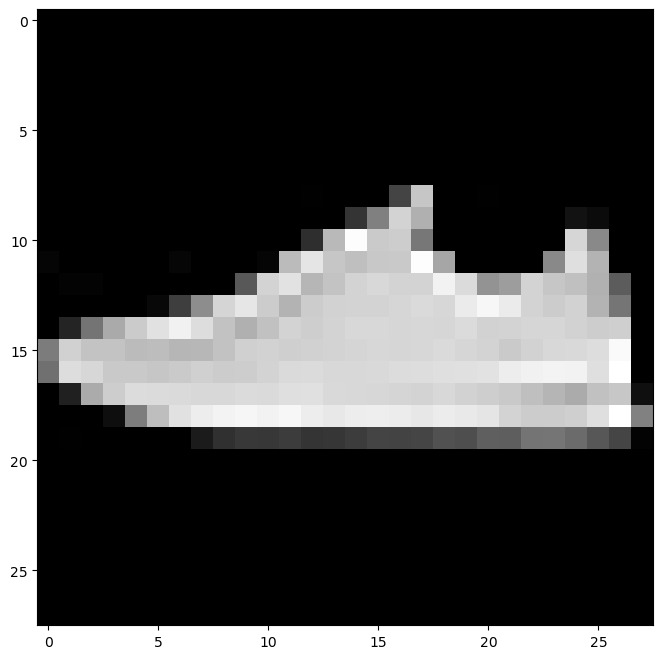

In [41]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 60, 60, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted output is: {prediction}")
print(f"actual output is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

The neural network hasn't been trained, so it is expected that predicted value is incorrect.

In [42]:
# Train your network with stochastic gradient descent!
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.7688745843649447
1-Epoch Cost = 0.12009781635704167
2-Epoch Cost = 0.1069763517684431
3-Epoch Cost = 0.0997315825419647
4-Epoch Cost = 0.09437926248807597


## Training Outcome Analysis

Post-training, we observe a trend of decreasing errors across epochs. However, the rate of reduction in error isn't as steep as one might hope for. This is likely attributed to the inherent complexity of the Fashion MNIST dataset, which poses a challenging task for the model's learning process.


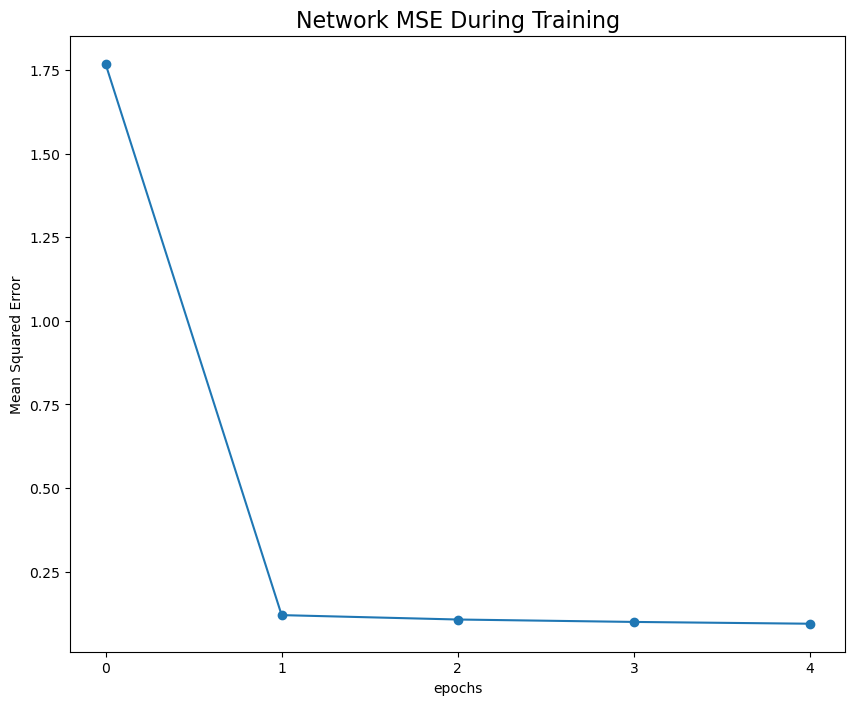

In [43]:
# Visualize the mean squared error over the training process 
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()

## Visualizing MSE Across Epochs

Upon graphing the Mean Squared Error (MSE) at each epoch, we notice a distinct pattern: a substantial initial drop in the error, followed by smaller, less significant decreases in subsequent epochs. This visualization highlights the initial rapid learning phase of the model, where it quickly grasps the basic patterns in the data. The smaller reductions thereafter suggest that further learning becomes more incremental, as the model starts to fine-tune its understanding of the more nuanced aspects of the dataset.


We will now input images that the model has not seen these before.

predicted digit is: 5
actual digit is: 5


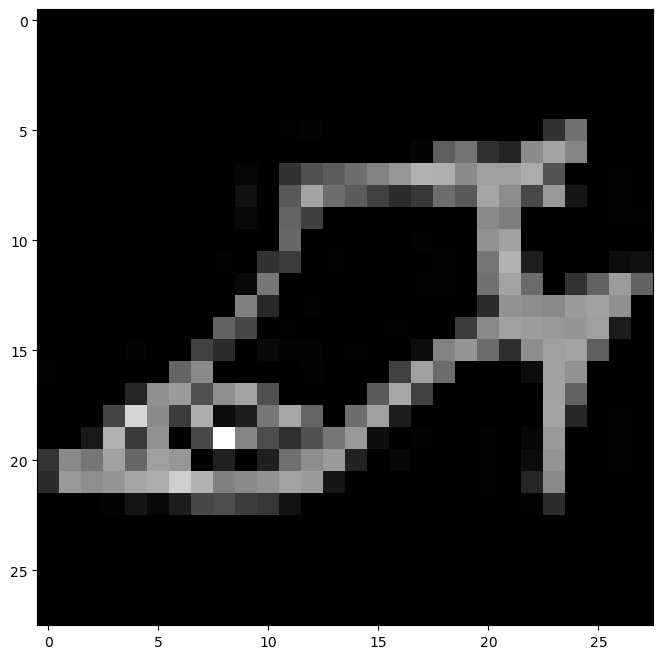

In [44]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 6
actual digit is: 6


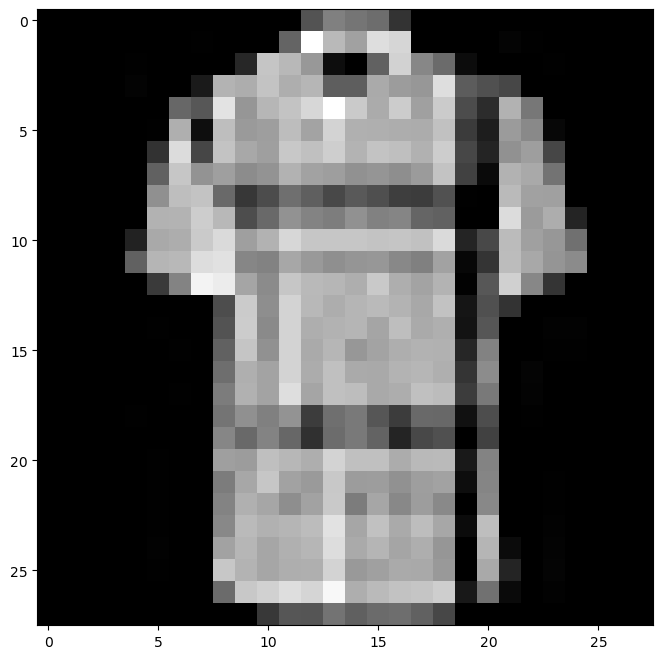

In [45]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 5
actual digit is: 5


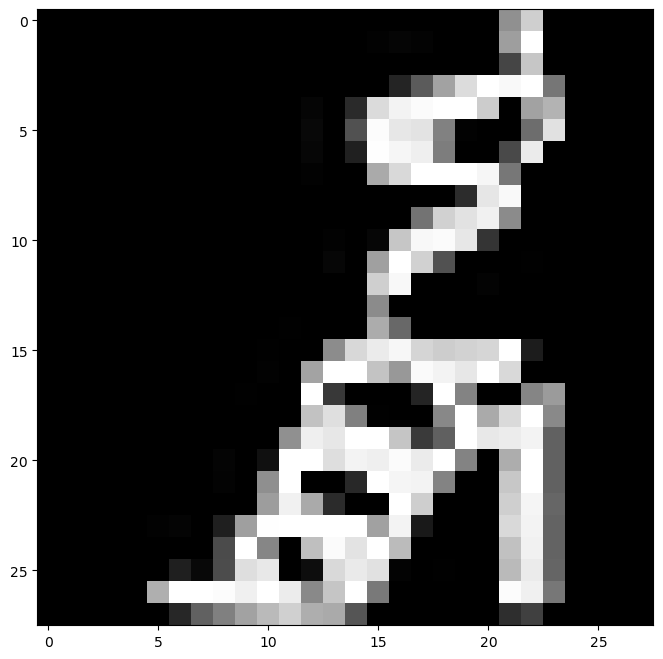

In [46]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

From the tests, the model appears to be accurate. We will check the classifcation accuracy below:

In [47]:
# Compute the classification accuracy of our trained model on the test data
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.8516

## Evaluating Model Accuracy on Test Data

After training, we assess the model's performance on the test dataset. The classification accuracy, calculated as the proportion of correct predictions, stands at around 85%. While this is a respectable figure, it does indicate that there is significant room for improvement.

### Insights and Next Steps

- **Data Complexity**: The Fashion MNIST dataset is inherently complex, featuring a variety of fashion items with intricate details. This complexity can inherently limit the accuracy achievable by simpler neural network architectures.
- **Potential for Improvement**: Given the room for improvement, we plan to experiment with a more complex neural network. Increasing the number of layers and nodes in each layer could potentially enhance the model's ability to capture and learn more intricate patterns in the data, thereby improving accuracy.

In pursuit of better performance, our next step will be to implement and train a neural network with increased depth and breadth to see if it yields better results in terms of accuracy.


In [48]:
net = DenseNetwork(layers = [784, 120, 145, 120, 10])
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.2939579354711561
1-Epoch Cost = 0.12983501475528908
2-Epoch Cost = 0.10983125746533783
3-Epoch Cost = 0.10075017980551396
4-Epoch Cost = 0.09433500841793324


In [49]:
# Compute the classification accuracy of the new trained model on the test data
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.853

## Experimenting with a More Complex Network

To explore the potential for improved accuracy, we trained a more intricate version of our `DenseNetwork`, increasing the number of layers and nodes:

- **New Architecture**: The network now consists of layers with 784, 120, 145, 120, and 10 nodes, respectively.

### Performance of the Enhanced Model

After training this more complex network, we evaluated its classification accuracy on the test dataset. Surprisingly, the accuracy observed is approximately 85.3%, which is similar to our previous simpler model.

### Analysis

- **Expectation vs. Reality**: While it was anticipated that a more complex network might perform better due to its increased capacity to learn intricate patterns, the results suggest otherwise. This can be attributed to several factors such as overfitting, where the model performs well on training data but fails to generalize effectively to unseen data.
- **Model Complexity**: Adding more layers and nodes does not always guarantee better performance. It also increases the risk of overfitting and might require more nuanced tuning of parameters and training regimen.

### Conclusion

These results underscore the importance of careful architecture selection and parameter tuning in neural network models. It suggests that simply increasing the network's complexity is not always the straight path to higher accuracy. Future experiments could involve tweaking other aspects like learning rate, epoch number, and regularization techniques.